# Research Notebook
Lukas Lehmann (Student) <br>
Date: Feb. 17 - Feb. 10


# 1: Experience
## Describe at least one research activity you worked on this week. 

### 1: Experience
I have added functions to my helper.py document to display orbit plots. I also fixed small bugs in the draft..

## Motivation:

The aim of this week was to present the orbits plots clearly, for this purpose I have put together various graphs that give me an overview (angle as a function of r, r as a function of time, etc.). The main goal was to clarify the relationship between $V_{eff}$, $r_0$ and $E$ and their effect on the orbit.  For this, https://icourse.club/uploads/files/9005b735d08a669d315b415b08aa033984efb646.pdf p. 207 served as a template. I also noticed some errors during the process, which I naturally corrected.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.


First of all, necessary definitions and imports to show my progress:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sympy import latex
from IPython.display import display, Markdown
import matplotlib.colors as mcolors
from itertools import product
import draft_v3
import Helper

# definig variables 
gamma = Helper.SymbolWithValue('gamma', np.log(2) / (np.sqrt(3) * np.pi))
beta_b, beta_c = Helper.SymbolWithValue('beta_b', 0), Helper.SymbolWithValue('beta_c', 0)
L_0 = Helper.SymbolWithValue('L_0', 5)
M = 1
r = sp.Symbol("r", nonnegative=True)

# definitions to calculate Q_b/c in dependence of beta and L_0 which gives us more possibilitys  to compare the influence of Q_b/c on different eq.

Q_b = Helper.SymbolicFunction2(abs(beta_b) * gamma ** 2 * L_0 ** 2, [gamma, L_0], beta_b, name='Q_b')
Q_c = Helper.SymbolicFunction2(abs(beta_c) * gamma ** 2 * L_0 ** 6, [gamma, L_0], beta_c, name='Q_c')

R_s = sp.Symbol('R_s')

q_b, q_c = sp.Symbol('Q_b'), sp.Symbol('Q_c')
param= (q_b, q_c, R_s)

f = sp.Lambda((r, param), (1 + q_b / r**2) * (1 + q_c * (R_s)**2 / (4 * r**8))**(-1 / 4) * ( 1 - (R_s)/ sp.sqrt(r**2 + q_b )))
g = sp.Lambda((r, param), (1 + q_c * R_s**2 / (4 * r**8))**(1 / 4) * (1 - R_s / sp.sqrt(r**2 + q_b ))**(-1))
h = sp.Lambda((r, param), r**2 * (1 + q_c * R_s**2 / (4 * r**8))**(1 / 4))

Schwarzschield = draft_v3.MetricSystem(f, g, h, (beta_b.value, beta_c.value, L_0.value))
Impr = draft_v3.MetricSystem(f, g, h, (q_b, q_c, R_s))
BlackHole =  draft_v3.BH(M, [Schwarzschield, Impr], ['Schwarzschield', 'Impr'])


I added minima and maxima to the $V_{eff}$ display, and wrote a definition to plot a number n of varied plots for a partition of $Q_b$ into $frac{1}{n}$ elements and compare Schwarzschield with Improved metric.

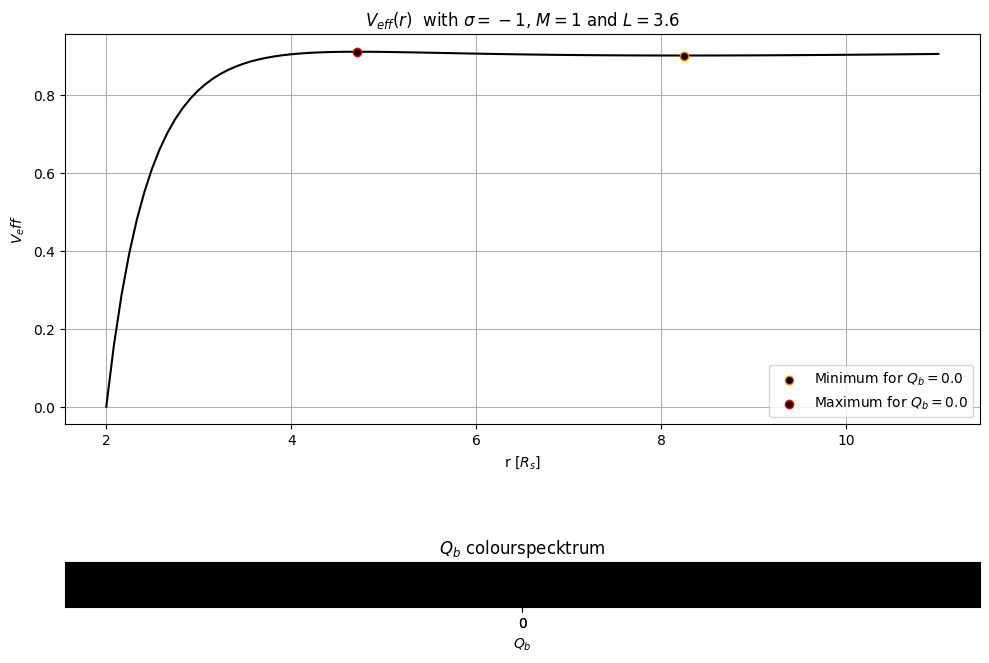

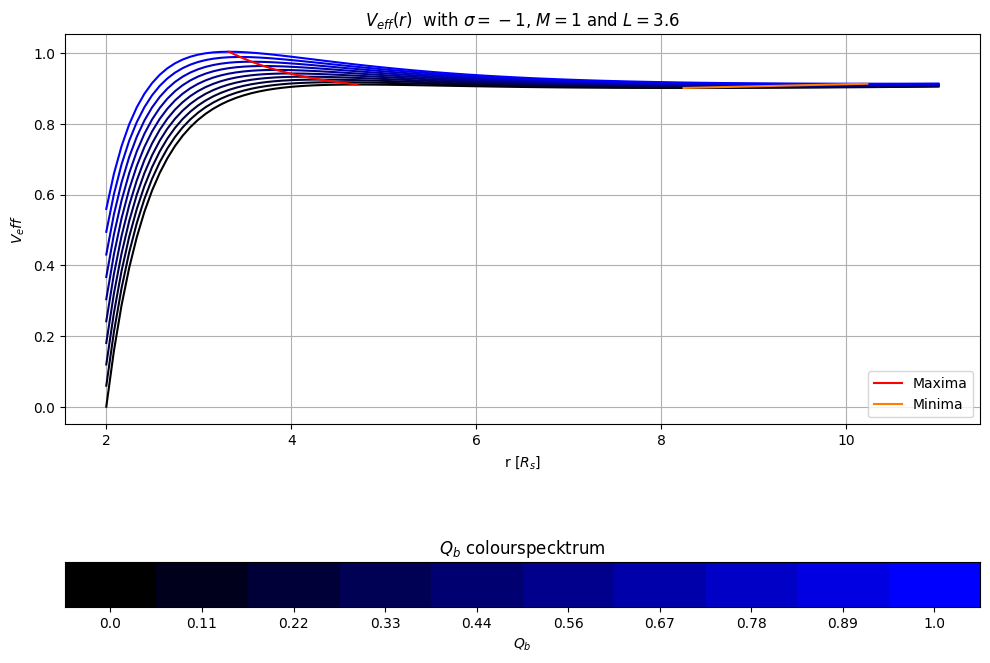

In [4]:
Helper.Veff_plt( BlackHole.Impr,sigma=-1, grad=1,L=3.6, r_int=[2,11])
Helper.Veff_plt( BlackHole.Impr,sigma=-1, grad=10,L=3.6, r_int=[2,11])

I have chosen a similar procedure as for $V_{eff}$ for the orbit plots, all codes can be found in the file Helper.py.

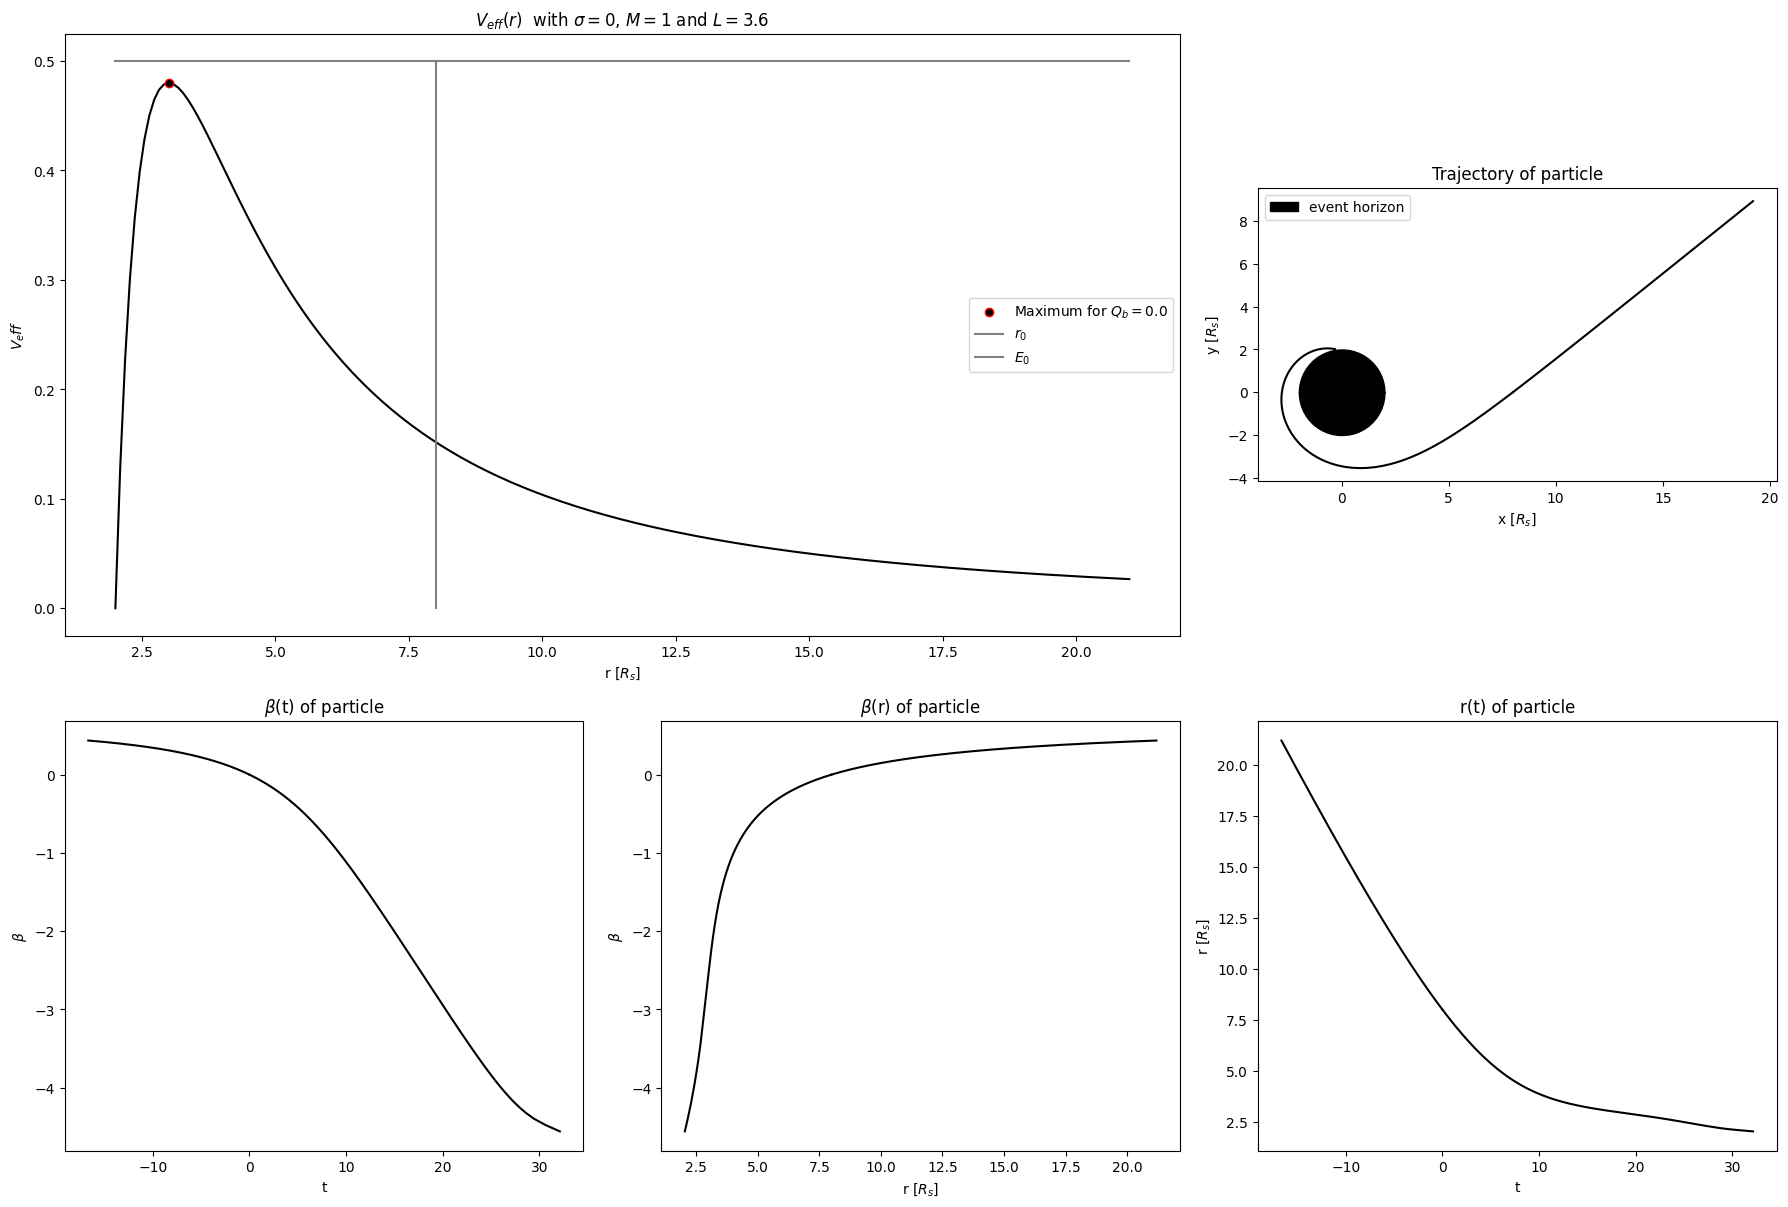

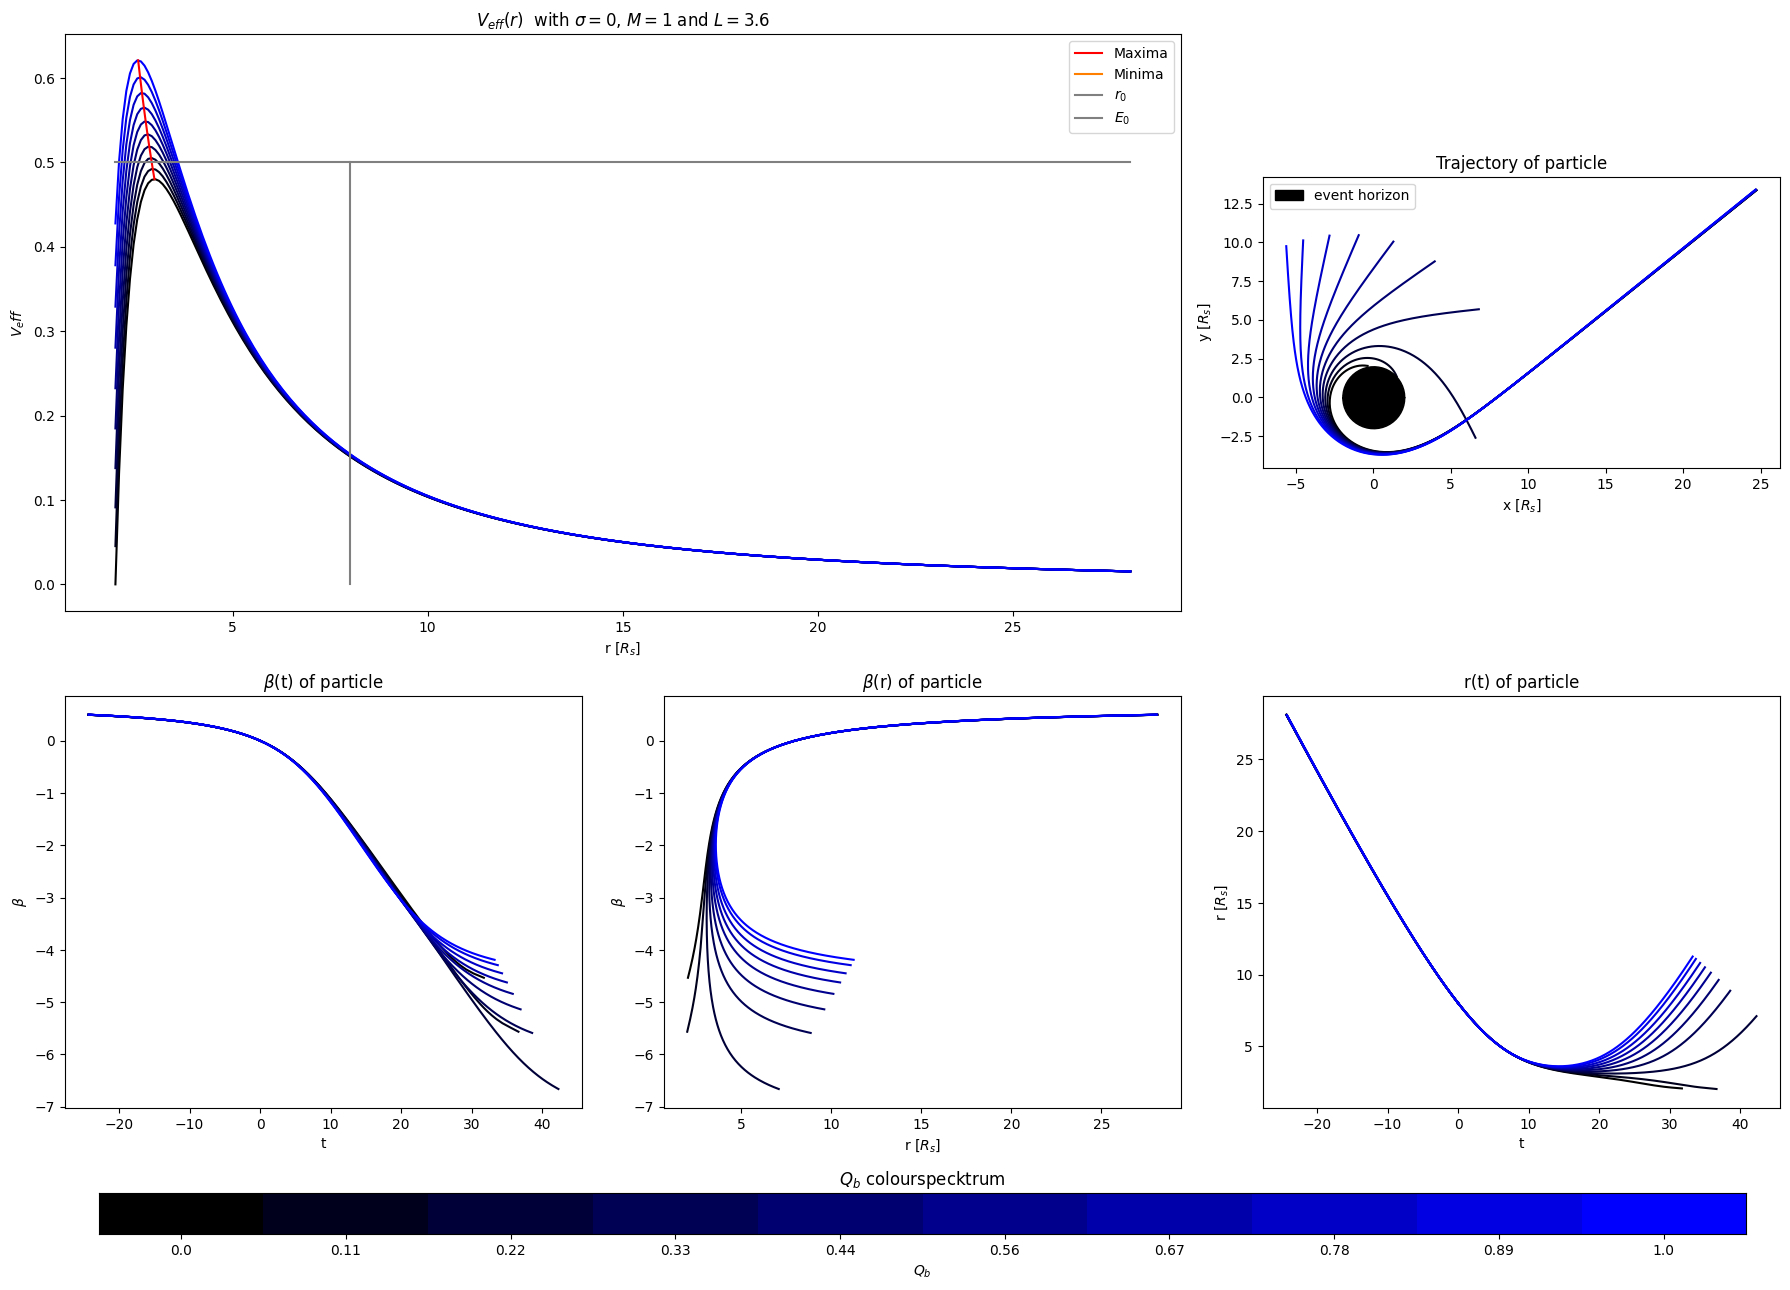

In [5]:
Helper.trPlot(BlackHole.Impr, grad=1,sigma=0, E = -np.sqrt(0.5),L=3.6, end=20, M=1, r_0=8)
Helper.trPlot(BlackHole.Impr, grad=10,sigma=0, E = -np.sqrt(0.5),L=3.6, end=30, M=1, r_0=8)

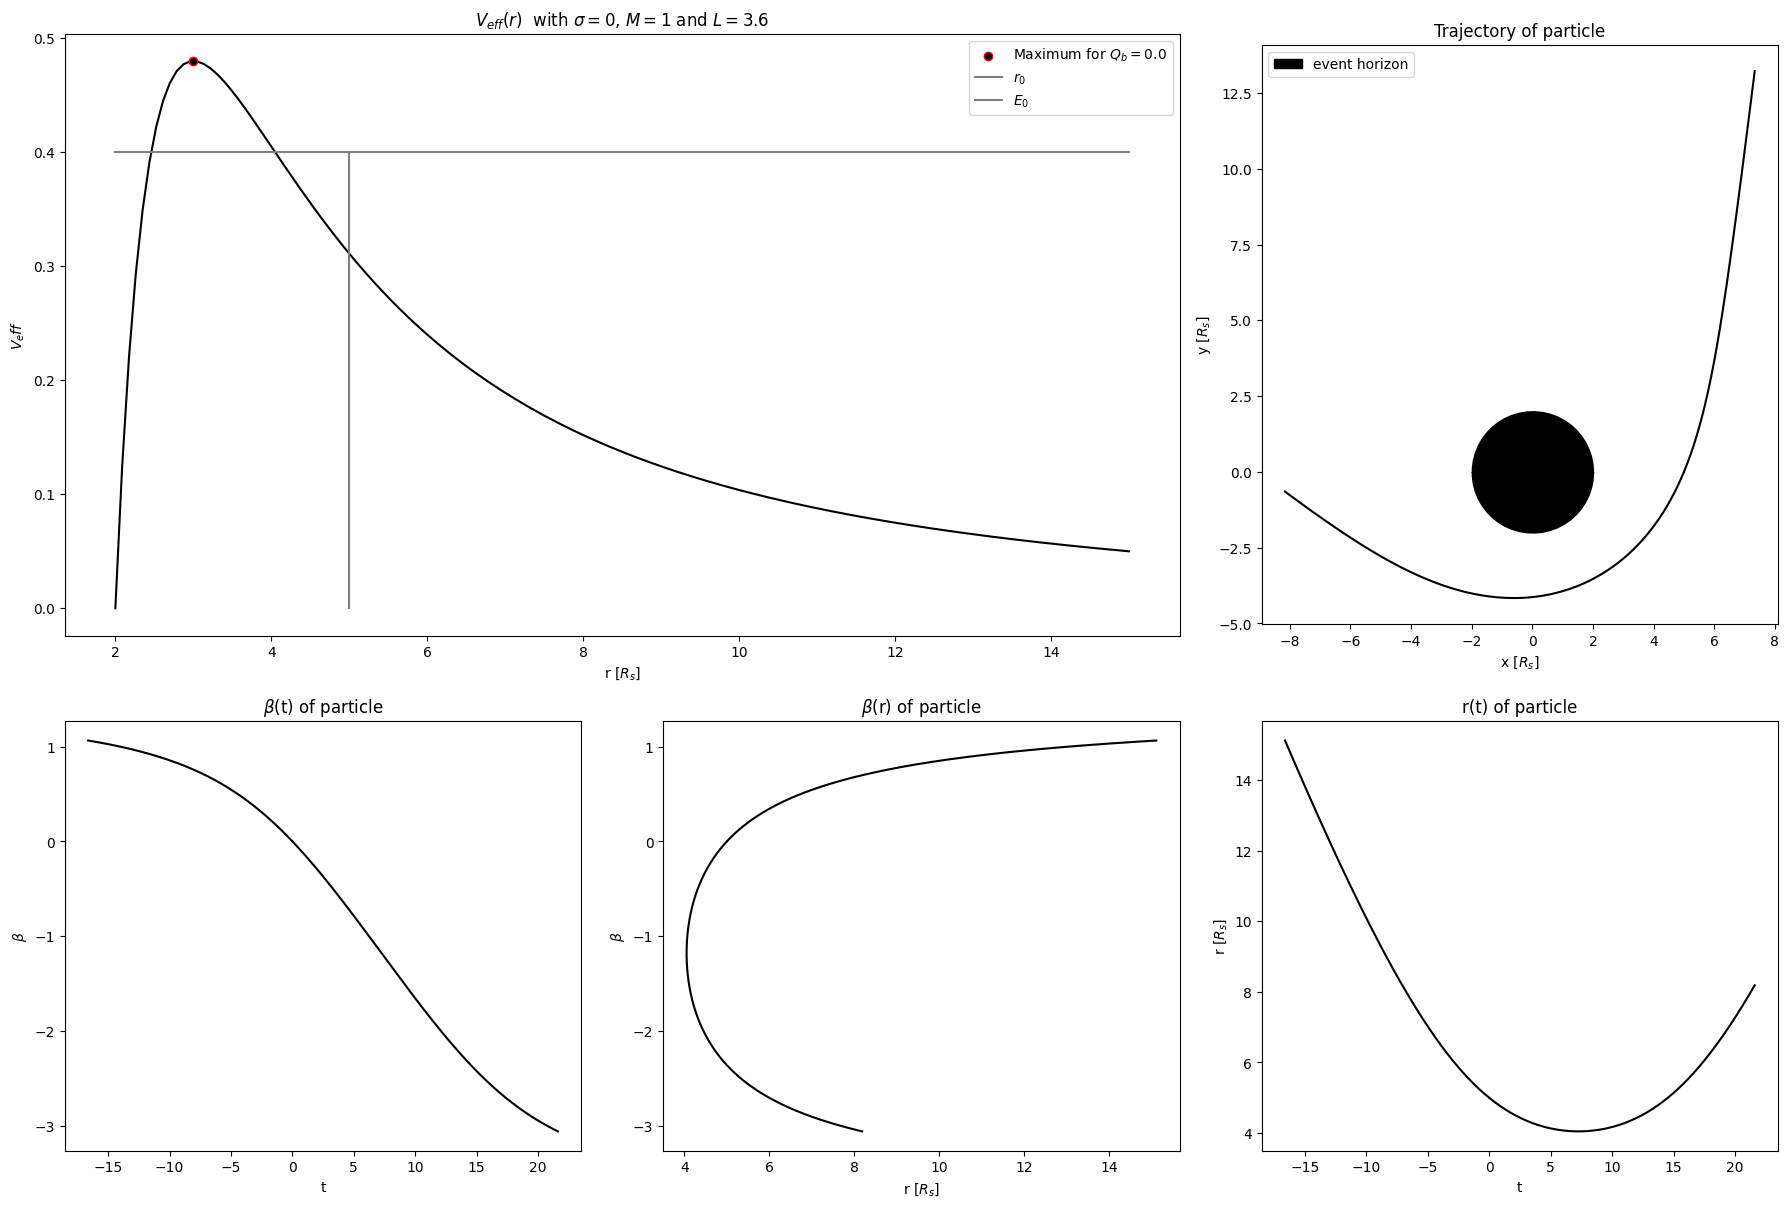

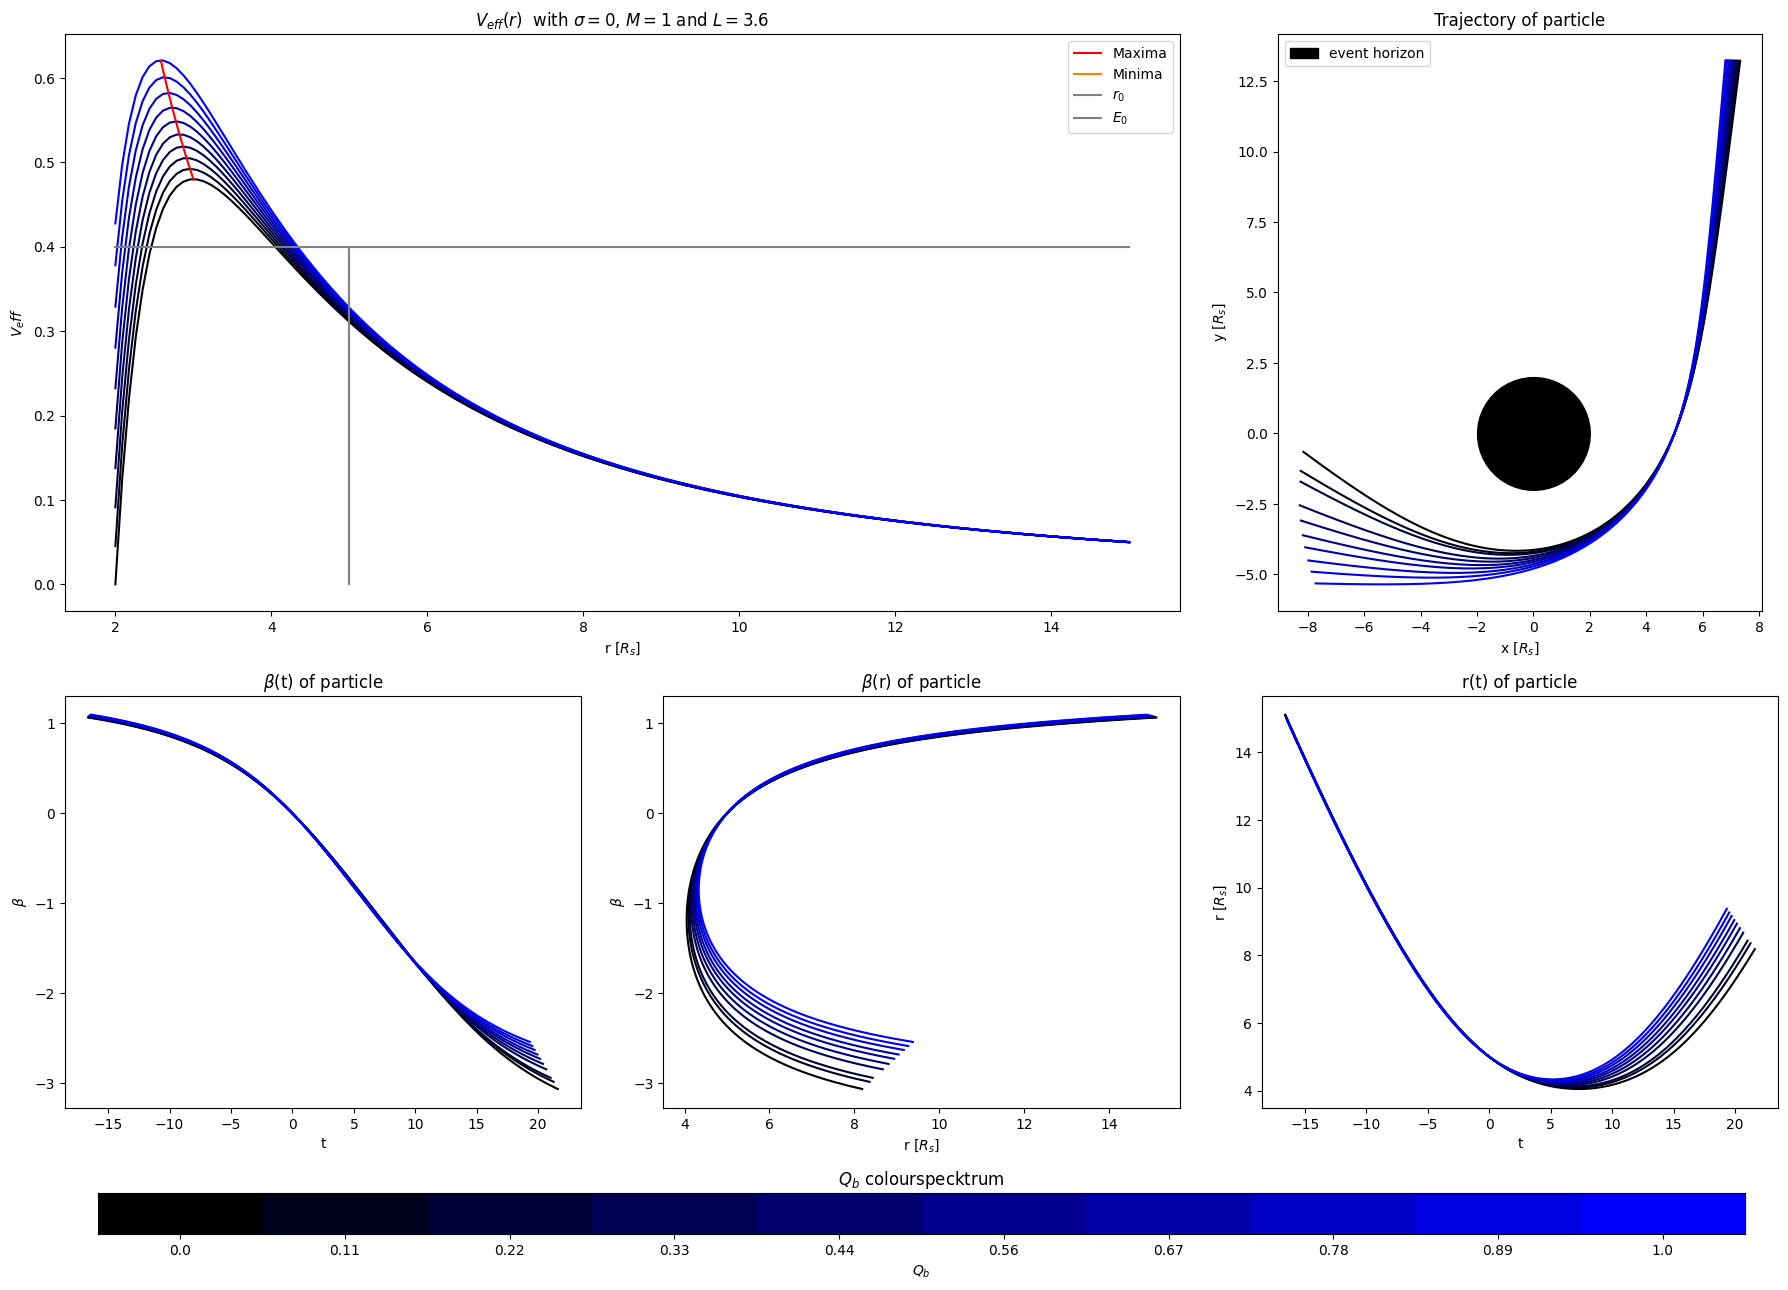

In [6]:
Helper.trPlot(BlackHole.Impr, grad=1, sigma=0, E = -np.sqrt(0.4),L=3.6, end=20, M=1, r_0=5)
Helper.trPlot(BlackHole.Impr, grad=10, sigma=0, E = -np.sqrt(0.4),L=3.6, end=20, M=1, r_0=5)

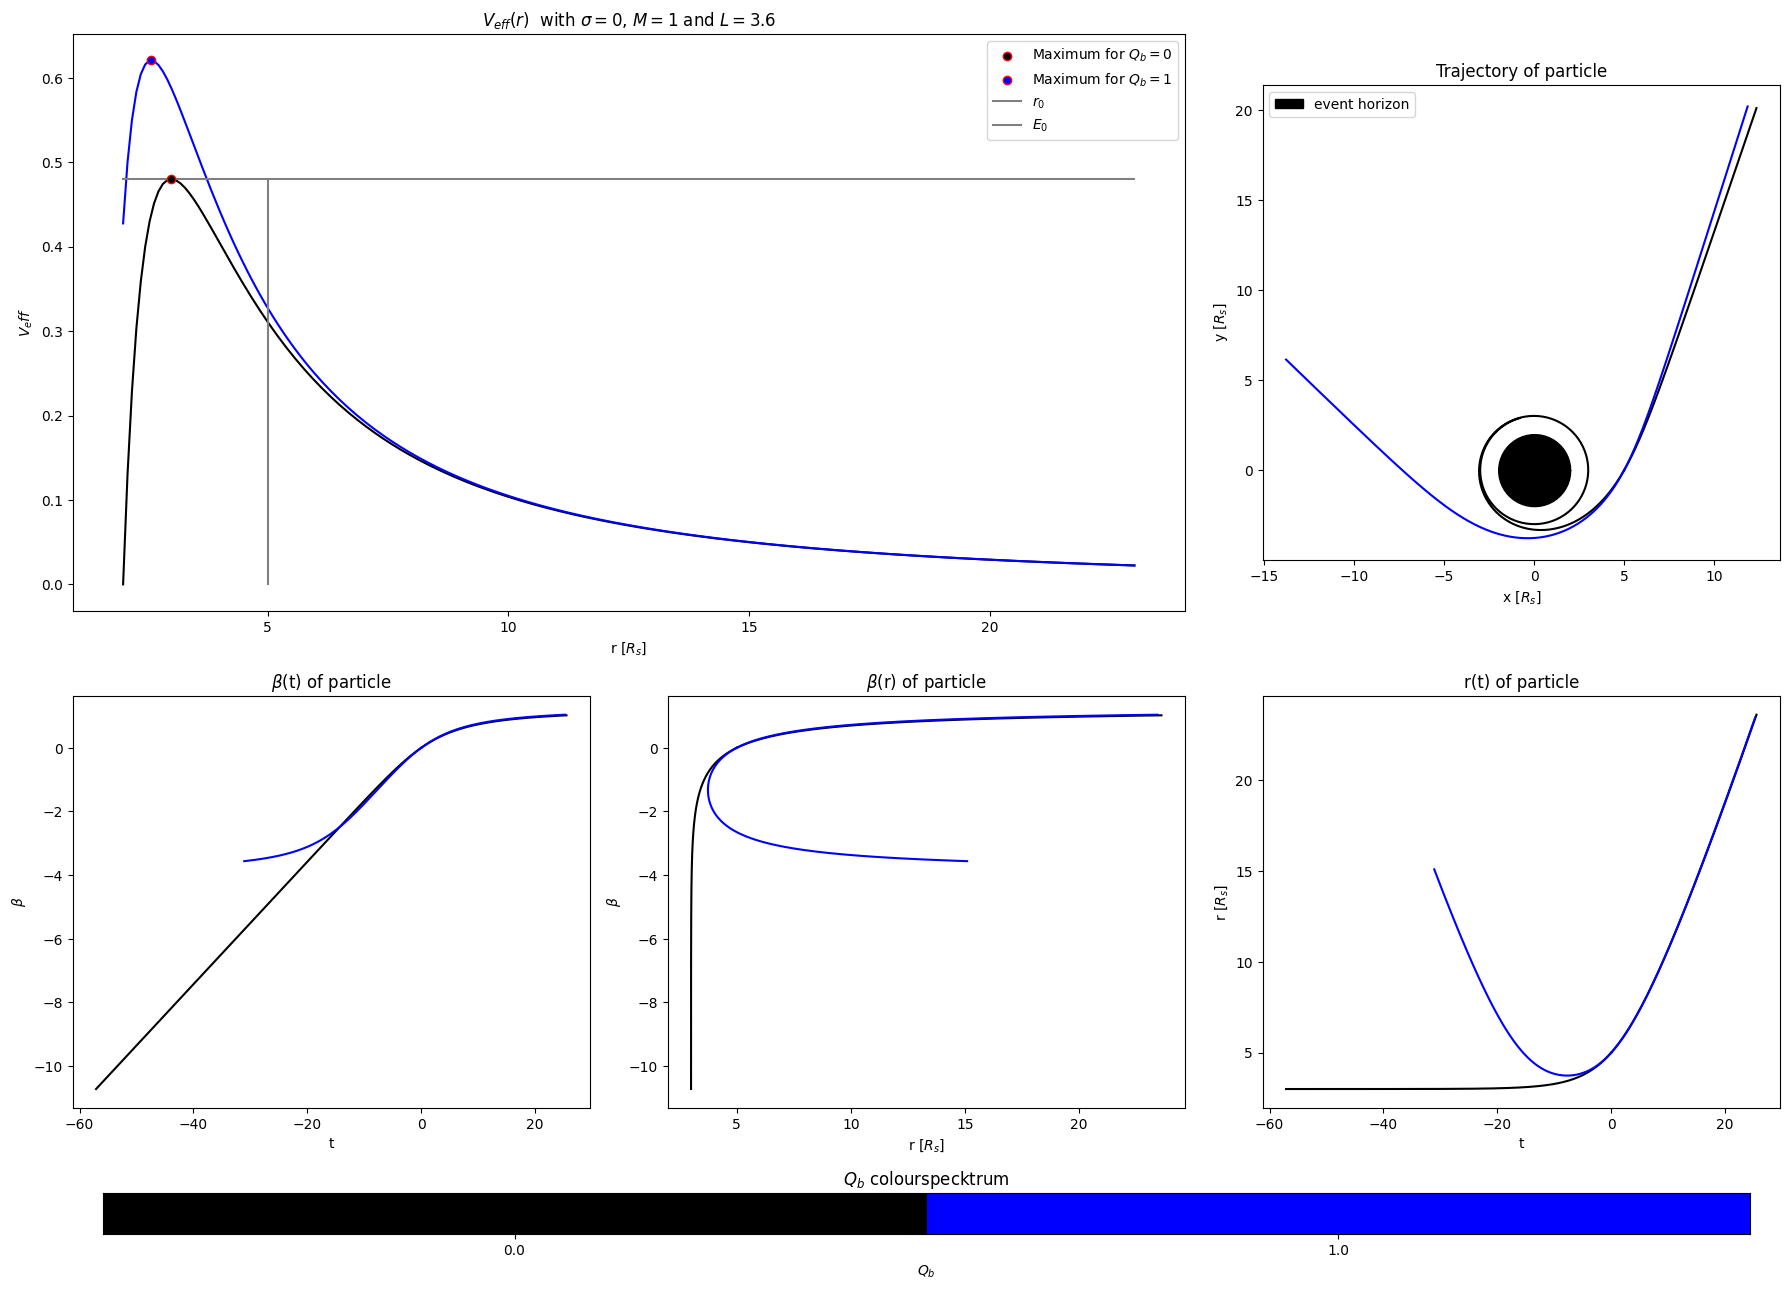

In [7]:
Helper.trPlot(BlackHole.Impr, sigma=0, E = np.sqrt(0.48),L=3.6, end=30, M=1, r_0=5, param=[(0,0,2), (1,0,2)])

# 3: So what? (What does it mean?)
## Describe your results

As already mentioned, the colourspectrum is used to display different $Q_b$ values. Thus we can see from the graphs how much the improved metric influences the result. The black curve is always the Schwarzschield solution. In addition, we have seen anectotically that the influence of $Q_c$ can initially be neglected. We also see that the behaviour becomes more extreme the closer the particle gets to the black hole. Furthermore, a maximum shift in $V_{eff}$ can be observed for increasing $Q_b$.


# 4. Now what? (What's next?)
## Plan for the next week

It is planned to first fix existing bugs, such as missing minima display, etc.. Secondly, it is planned to finalise the symbolic representation and to improve and embellish the code (comments, etc.). and finally, it is planned to investigate the results further, i.e. to find good parameters and to ensure that certain results are not caused by code errors, but actually look like this. 